¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Descripción del Proyecto

Investigación de una empresa emergente que vende productos alimenticios. Se Busca conocer el comportamiento que tienen los usuarios con la aplicación de la empresa. 

El dataset con el que se trabajará consta de lo siguiente:

- ventName: nombre del evento.
- DeviceIDHash: identificador de usuario unívoco.
- EventTimestamp: hora del evento.
- ExpId: número de experimento: 246 y 247 son los grupos de control, 248 es el grupo de prueba.

En primer lugar se investigará, mediante un embudo de ventas, cómo es que los usuarios llegan a la etapa de compra así como entender que sucede en las etapas previas. Para la segunda parte se estudiarán y analizarán los resultados de las pruebas A/A/B en la cual, para el grupo B se experimentó con una versión con fuentes alteradas de la aplicación.

## Importación de librerias y datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

In [2]:
logs = pd.read_csv("/datasets/logs_exp_us.csv", sep = '\t')

logs.head(2)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246


## Análisis exploratorio de datos.

In [3]:
print('Forma del data set "logs"')
display(logs.shape)
print('Información general del data set "logs"')
display(logs.info())
print('Primeras 5 filas del data set "logs"')
display(logs.head(5))
print('Últimas 5 filas del data set "logs"')
display(logs.tail(5))
print(f'El dataset contiene {logs.duplicated().sum()} filas duplicadas')

Forma del data set "logs"


(244126, 4)

Información general del data set "logs"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


None

Primeras 5 filas del data set "logs"


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


Últimas 5 filas del data set "logs"


,EventName,DeviceIDHash,EventTimestamp,ExpId
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246
244125,OffersScreenAppear,5746969938801999050,1565212517,246


El dataset contiene 413 filas duplicadas


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buena manera de leer los datos iniciales y de revisar su contenido

</div>

### Tratamiento de datos.

In [4]:
# Eliminación de filas duplicadas
logs = (
    logs.drop_duplicates()
    .rename(columns = {
        'EventName': 'event_name',
        'DeviceIDHash': 'user_id',
        'EventTimestamp': 'event_time',
        'ExpId': 'exp_id'
    })
)

logs['date_hour'] = pd.to_datetime(logs['event_time'], unit = 's')
logs['date'] = logs['date_hour'].dt.date

logs.head(5)

,event_name,user_id,event_time,exp_id,date_hour,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a><br/>
Correcta forma de reenombrar las columnas

</div>

### Conclusiones del análisis exploratorio de datos.

- El dataset consta de 244,126 filas y 4 columnas, no contiene valores nulos y tiene 413 filas duplicadas. Los nombres de las columnas tienen letras mayúsculas y nombres que no son muy representativos para mí.

- En el tratamiento de datos eliminé las filas repetidas ya que representan una cantidad muy pequeña de los datos y parace poco probable que un identificador de usuario unívoco con realicé el mismo evento a la misma hora. También cambié el nombre de las columnas por nombres que sean más representativos para mí. Por último se modificó el formato de la columna "EventTimestamp" ahora llamada "date" para que fuera más legible y manejable en procesos futuros.

- Para ayudar al futuro tratamiento de los datos, también se agregaron dos columnas, una con la fecha y hora del evento y otra con la fecha solamente.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buena manera de limpiar el dataset y buenas conclusiones intermedias

</div>

## Estudio y comprobación de datos.

In [5]:
logs.head(2)

,event_name,user_id,event_time,exp_id,date_hour,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25


### Total de eventos en los registros.

In [6]:
total_events = logs.shape[0]

print(f'El total de eventos del df es: {total_events}.')

El total de eventos del df es: 243713.


### Total de usuarios y usuarias en los registros.

In [7]:
total_users = logs['user_id'].nunique()

print(f'El total de usuarios/as en los registros es de: {total_users}.')

El total de usuarios/as en los registros es de: 7551.


### Promedio de usuarios por evento.

In [8]:
user_per_evenet_avg = total_events / total_users

print(f'El promedio de usuarios por evento es de: {user_per_evenet_avg}.')

El promedio de usuarios por evento es de: 32.27559263673685.


### Periodo de tiempo que cubren los datos.

#### Fecha máxima y mínima del Dateset.

In [9]:
max_date = logs['date'].max()
min_date = logs['date'].min()

print(f'La fecha máxima registrada del df es: {max_date}')
print(f'La fecha mínima registrada del df es: {min_date}')

La fecha máxima registrada del df es: 2019-08-07
La fecha mínima registrada del df es: 2019-07-25


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Has respondido correctamente las últimas preguntas, el formato que usas es limpio y ordenado.<br/>

</div>

#### Revisión de datos para verificar qué tan completos están.

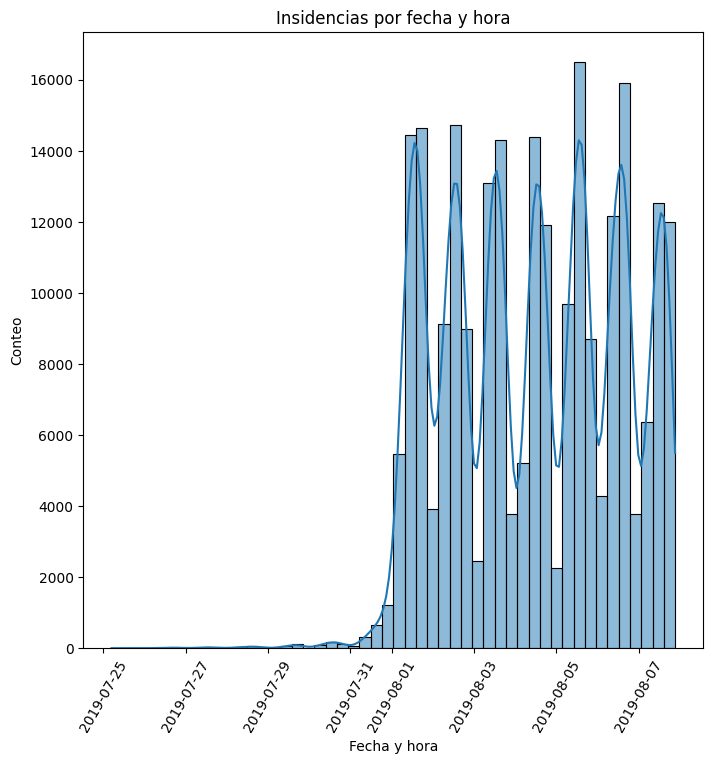

In [10]:
plt.figure(figsize = (8, 8))

sns.histplot(
    data = logs,
    x = 'date_hour',
    bins = 50,
    kde = True
)
plt.title('Insidencias por fecha y hora')
plt.xlabel('Fecha y hora')
plt.ylabel('Conteo')
plt.xticks(rotation = 60)

plt.show()

Parece que el df no cuenta con información completa previa al primero de agosto de 2019 por lo cuál veremos si podemos tomar en cuenta a partir de esta fecha para nuestro análisis.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto, buena manera de mostrar los datos y buena manera para decidir que fechas usar.<br/>

</div>

#### Periodo de tiempo que será tomado para el análisis de los datos.

In [11]:
events_per_user_per_day = (
    logs
    .groupby(['date', 'user_id'])
    .size()
    .reset_index(name = 'event_count')
)

mean_events_per_user_per_day = (
    events_per_user_per_day
    .groupby('date')['event_count']
    .mean()
)
print(f'Conteo de eventos por día {mean_events_per_user_per_day}')


Conteo de eventos por día date
2019-07-25    1.285714
2019-07-26    1.409091
2019-07-27    1.410256
2019-07-28    1.521739
2019-07-29    1.362963
2019-07-30    1.391892
2019-07-31    2.196970
2019-08-01    9.759924
2019-08-02    9.748835
2019-08-03    9.558300
2019-08-04    9.347321
2019-08-05    9.483956
2019-08-06    9.124936
2019-08-07    8.517119
Name: event_count, dtype: float64


#### Conclusiones del análisis del periodo de tiempo para tomar en cuenta en el análisis.

Tanto el histograma como el promedio de eventos obtenido después me hacen pensar que la mejor fecha para tomar en cuenta será a partir del primero de agosto de 2019

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buena manera de llegar a esa conclusion, me gusta que comprobaste con datos lo que se observa en la gráfica .<br/>

</div>

### Total de datos que se dejaron fuera del estudio.

In [12]:
limit_date = pd.to_datetime('2019-07-31')

logs_filtered = logs[logs['date'] > limit_date]

data_out = (
    logs.shape[0]
    - logs_filtered.shape[0]
)
percentage = (
    (data_out
    / logs.shape[0])*100
)
print(f'El total de datos dejados fuera son: {data_out} que corresponden al {percentage:.3f}% de los datos totales')

El total de datos dejados fuera son: 2826 que corresponden al 1.160% de los datos totales


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buena manera de encontrar la cantidad de datos que se dejan fuera, resultan poco significativos para el analisis final.<br/>

</div>

### Comprobación de datos de usuarios y usuarias de los 3 grupos de estudio.

In [13]:
group_246 = logs[logs['exp_id'] == 246]
group_247 = logs[logs['exp_id'] == 247]
group_248 = logs[logs['exp_id'] == 248]

print(f"""
El total de participantes en el grupo 246 es de {group_246.shape[0]}.
El total de participantes en el grupo 247 es de {group_247.shape[0]}.
El total de participantes en el grupo 248 es de {group_248.shape[0]}
""")


El total de participantes en el grupo 246 es de 80181.
El total de participantes en el grupo 247 es de 77950.
El total de participantes en el grupo 248 es de 85582



Con la base de datos filtrada tenemos entre 77,950 y 85,582 datos.

## Estudio del embudo de eventos.

In [14]:
logs_filtered.head(2)

,event_name,user_id,event_time,exp_id,date_hour,date
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01


### Tipo de eventos en el registro y su frecuencia de suceso por orden.

In [15]:
data_grouped = (
    logs_filtered
    .groupby('event_name')
    .size()
    .sort_values(ascending = False)
    .reset_index(name = 'total')
)

print('Frecuencia por cada evento')
display(data_grouped)

Frecuencia por cada evento


,event_name,total
0,MainScreenAppear,117328
1,OffersScreenAppear,46333
2,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Se puede observar como la cantidad de eventos disminuye conforme se avanza en el proceso de la compra.<br/>

</div>

### Cantidad de usuarios y usuarias que realizan estas acciones por orden.

Usuarios y usuarias que realizaron la acción al menos una vez.

In [16]:
users_per_event = (
    logs_filtered
    .groupby('event_name')['user_id']
    .nunique()
    .sort_values(ascending = False)
    .reset_index()
).rename(columns = {'user_id': 'user_quantity'})

users_per_event['proportion'] = (
    users_per_event['user_quantity']
    / total_users
)

users_per_event

,event_name,user_quantity,proportion
0,MainScreenAppear,7419,0.982519
1,OffersScreenAppear,4593,0.608264
2,CartScreenAppear,3734,0.494504
3,PaymentScreenSuccessful,3539,0.468680
4,Tutorial,840,0.111244


#### Conclusiones sobre cantidad de usuarios/as que realizan una acción.

En el total de eventos registrados entre el total de usuarios: Poco más del 98% de los usuarios registrados realizan el primer evento y casi el 47% llegan a la parte de compra. La mayor pérdida se encuentra entre los que están en la pantalla principal y los que van a la pantalla de oferta.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Al filtrar por usuarios en lugar de eventos (como en la tabla anterior a este ejercicio) se puede observar una cantidad mucho menor en el total.<br/>
Al realizar una comparativa de este estilo el negocio se puede enfocar en mejorar la experiencia del usuario para generar una disminución menor de usuarios en cada una de las etapas


</div>

### Orden en que ocurrieron las acciones y si son parte de una misma secuencia.

El orden aparente sería:
   - Pantalla principal.
   - Pantalla de descuento.
   - Pantalla de carro de compra.
   - Pantalla de pago exitoso.
   
Hay un evento más llamado tutorial que no tengo información suficiente para pensar que es al final de la compra ya que los productos con los que se trabajan con tiene mucho senntido que tengan un tutorial.

### Embudo: Proporción de usuarios y usuarias que pasan de una etapa a la siguiente.

In [17]:
# Tabla para mostrar el primer evento de cada usuario.
users_pivot = logs_filtered.pivot_table(
    index = 'user_id',
    columns = 'event_name',
    values = 'date_hour',
    aggfunc = 'min'
)

users_pivot.head(2)

event_name,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
user_id,,,,,
6888746892508752,NaT,2019-08-06 14:06:34,NaT,NaT,NaT
6909561520679493,2019-08-06 18:52:58,2019-08-06 18:52:54,2019-08-06 18:53:04,2019-08-06 18:52:58,NaT


In [18]:
users_pivot.count()

event_name
CartScreenAppear           3734
MainScreenAppear           7419
OffersScreenAppear         4593
PaymentScreenSuccessful    3539
Tutorial                    840
dtype: int64

### Etapa de mayor pérdida de usuarios y usuarias.

In [19]:
step_1 = users_pivot[~users_pivot['MainScreenAppear'].isna()]
step_2 = step_1[(~step_1['OffersScreenAppear'].isna()) & (step_1['OffersScreenAppear'] > step_1['MainScreenAppear'])]
step_3 = step_2[(~step_2['CartScreenAppear'].isna()) & (step_2['CartScreenAppear'] > step_2['OffersScreenAppear'])]
step_4 = step_3[(~step_3['PaymentScreenSuccessful'].isna()) & (step_3['PaymentScreenSuccessful'] > step_3['CartScreenAppear'])]
step_5 = step_4[(~step_4['Tutorial'].isna()) & (step_4['Tutorial'] > step_4['PaymentScreenSuccessful'])]

# Total de usuarios que pasaron a una etapa realizaando la etapa previa.
n_main_screen = step_1.shape[0]
n_offers_screen = step_2.shape[0]
n_cart_screen = step_3.shape[0]
n_pay_screen = step_4.shape[0]
n_tutorial = step_5.shape[0]

# Porcentaje de usuarios que pasan a la siguiente etapa
p_main_screen = n_main_screen / total_users
p_offers_screen = n_offers_screen / n_main_screen
p_cart_screen = n_cart_screen / n_offers_screen
p_pay_screen = n_pay_screen / n_cart_screen
p_tutorial = n_tutorial / n_pay_screen

print(f'Total de usuarios: {n_main_screen} y el porcentaje de la etapa previe es: {p_main_screen}')
print(f'Usuarios que llegaron a la pantalla de ofertas: {n_offers_screen} y el porcentaje de la etapa previa es: {p_offers_screen}')
print(f'Usuarios que llegaron al carrito de compras: {n_cart_screen} y el porcentaje de la etapa previa es: {p_cart_screen}')
print(f'Usuarios que llegaron a la pantalla de pago exitoso: {n_pay_screen} y el porcentaje de la etapa previa es: {p_pay_screen}')
print(f'Usuarios que llegaron al tutorial: {n_tutorial} y el porcentaje de la etapa previa es: {p_tutorial}')
print("""
""")
print(f'La pérdida de pantalla  a la de  es de: {1 - p_main_screen}')
print(f'La pérdida de pantalla principal a la de ofertas es de: {p_main_screen - p_offers_screen}')
print(f'La pérdida de pantalla de ofertas a la de carrito es de: {p_offers_screen - p_cart_screen}')
print(f'La pérdida de pantalla de carrito a la de pago es de: {p_cart_screen - p_pay_screen}')



Total de usuarios: 7419 y el porcentaje de la etapa previe es: 0.9825188716726262
Usuarios que llegaron a la pantalla de ofertas: 4201 y el porcentaje de la etapa previa es: 0.5662488205957676
Usuarios que llegaron al carrito de compras: 1767 y el porcentaje de la etapa previa es: 0.42061413949059745
Usuarios que llegaron a la pantalla de pago exitoso: 454 y el porcentaje de la etapa previa es: 0.2569326542161856
Usuarios que llegaron al tutorial: 1 y el porcentaje de la etapa previa es: 0.0022026431718061676


La pérdida de pantalla  a la de  es de: 0.017481128327373807
La pérdida de pantalla principal a la de ofertas es de: 0.41627005107685855
La pérdida de pantalla de ofertas a la de carrito es de: 0.1456346811051702
La pérdida de pantalla de carrito a la de pago es de: 0.16368148527441184


La etapa en la que la mayor cantidad de usuarios se pierden es en el paso de la pantnalla principal a la pantalla de oferta con un casi 42% de pérdida.

### Porcentaje de usuarios y usuarias que hacen todo el recorrido.

Tomando en cuenta que el tutorial no es parte del recorrido, un 25% de los usuarios realizan todo el recorrido.

## Estudio de resultados del experimento.

### Cantidad de usuarios y usuarias en cada grupo.

In [20]:
total_users_group_246 = group_246['user_id'].shape[0] 
total_users_group_247 = group_247['user_id'].shape[0]
total_users_group_248 = group_248['user_id'].shape[0]

unique_group_246_users = group_246[group_246['exp_id'] == 246]['user_id'].nunique()
unique_group_247_users = group_247[group_247['exp_id'] == 247]['user_id'].nunique()
unique_group_248_users = group_248[group_248['exp_id'] == 248]['user_id'].nunique()

print(f'El total de usuarios en el grupo 246 es: {total_users_group_246} y los usuarios únicos son: {unique_group_246_users}')
print(f'El total de usuarios en el grupo 247 es: {total_users_group_247} y los usuarios únicos son: {unique_group_247_users}')
print(f'El total de usuarios en el grupo 248 es: {total_users_group_248} y los usuarios únicos son: {unique_group_248_users}')


El total de usuarios en el grupo 246 es: 80181 y los usuarios únicos son: 2489
El total de usuarios en el grupo 247 es: 77950 y los usuarios únicos son: 2520
El total de usuarios en el grupo 248 es: 85582 y los usuarios únicos son: 2542


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buena manera de crear y ordenar a los usuarios en sus grupos.<br/>

</div>

### Comprobación de diferencia significativa entre los grupos A/A (246 y 247).

In [21]:
t_stat, p_value = mannwhitneyu(total_users_group_246, total_users_group_247, alternative = 'two-sided')

print(f'Estadístico t con el total de usuarios en los grupos 246 y 247: {t_stat}')
print(f'Valor p con el total de usuarios en los grupos 246 y 247: {p_value}')

t_stat, p_value = mannwhitneyu(unique_group_246_users, unique_group_247_users, alternative='two-sided')

print(f'Estadístico t con los usuarios únicos en los grupos 246 y 247 es: {t_stat}')
print(f'Valor p con los usuarios únicos en los grupos 246 y 247 es: {p_value}')

Estadístico t con el total de usuarios en los grupos 246 y 247: 1.0
Valor p con el total de usuarios en los grupos 246 y 247: 1.0
Estadístico t con los usuarios únicos en los grupos 246 y 247 es: 0.0
Valor p con los usuarios únicos en los grupos 246 y 247 es: 1.0


#### Conclusiones de la ddiferencia significativa.

Tanto en las pruebas mannwhitneyu para el total de eventos registrados como para usuarios únicos obtuvimos que no hay una diferencia significativa entre los grupos. De hecho, el valor p igual a 1.0 nos indica que las pruebas son practicamente iguales

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto, buena manera de realizar la prueba y de llegar a las conclusiones.<br/>

</div>

### Diferencia significativa por evento.

In [22]:
# Función para agrupar los df por nombre del evento y el total de usuarios únicos.
def event_proportion(df, exp_id, unique_group_users):
    grouped_df = (
        df.loc[df['exp_id'] == exp_id]
        .groupby('event_name')['user_id']
        .nunique()
        .reset_index()
    ).rename(columns = {'user_id': 'total_users'})

    grouped_df['proportion'] = grouped_df['total_users'] / unique_group_users
    
    grouped_df = grouped_df.sort_values(by = 'total_users', ascending = False)

    return grouped_df

event_users_proportion_246 = event_proportion(logs_filtered, 246, unique_group_246_users)
event_users_proportion_247 = event_proportion(logs_filtered, 247, unique_group_247_users)
event_users_proportion_248 = event_proportion(logs_filtered, 248, unique_group_248_users)

display(event_users_proportion_246.head(2))
display(event_users_proportion_247.head(2))
display(event_users_proportion_248.head(2))

,event_name,total_users,proportion
1,MainScreenAppear,2450,0.984331
2,OffersScreenAppear,1542,0.619526


,event_name,total_users,proportion
1,MainScreenAppear,2476,0.982540
2,OffersScreenAppear,1520,0.603175


,event_name,total_users,proportion
1,MainScreenAppear,2493,0.980724
2,OffersScreenAppear,1531,0.602282


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Se observa que los tres grupos son muy parecidos.<br/>

</div>

In [23]:

alpha = 0.05
# Función para mostrar si hay o no significancia estadística.
# Tomamos dos datasets con los eventos como parámetros.
def test_event_significance(df1, df2):
    # Unimos los datasets
    common_events = set(df1['event_name']).intersection(set(df2['event_name']))
    
    # Lista para almacenar los resultados del bucle
    results = []
    
    for event_name in common_events:
        event_1 = df1[df1['event_name'] == event_name]
        event_2 = df2[df2['event_name'] == event_name]
        
        # Dentro del bucle realizamos las pruebas estadísticas para nuestros datos
        
        _, p_value_users = mannwhitneyu(event_1['total_users'], event_2['total_users'])
        _, p_value_proportion = mannwhitneyu(event_1['proportion'], event_2['proportion'])
        
        # Agregar resultados a la lista
        results.append({
            'event_name': event_name,
            'p_value_users': p_value_users,
            'p_value_proportions': p_value_proportion,
            'Significancia usuarios': 'Sí' if p_value_users < alpha else 'No',
            'Significancia porporciones': 'Sí' if p_value_proportion < alpha else 'No'
        })
        
        results_df = pd.DataFrame(results)
        
    return results_df
    
results_AA = test_event_significance(event_users_proportion_246, event_users_proportion_247)
display(results_AA)   

,event_name,p_value_users,p_value_proportions,Significancia usuarios,Significancia porporciones
0,PaymentScreenSuccessful,1.0,1.0,No,No
1,Tutorial,1.0,1.0,No,No
2,OffersScreenAppear,1.0,1.0,No,No
3,CartScreenAppear,1.0,1.0,No,No
4,MainScreenAppear,1.0,1.0,No,No


### Comparación de resultados con el grupo de fuentes alteradas.

In [24]:
results_AB = test_event_significance(event_users_proportion_246, event_users_proportion_248)
display(results_AB)

,event_name,p_value_users,p_value_proportions,Significancia usuarios,Significancia porporciones
0,PaymentScreenSuccessful,1.0,1.0,No,No
1,Tutorial,1.0,1.0,No,No
2,OffersScreenAppear,1.0,1.0,No,No
3,CartScreenAppear,1.0,1.0,No,No
4,MainScreenAppear,1.0,1.0,No,No


#### Conclusiones nivel de significancia.

En el análisis con la prueba Mann-Whitney U no parece encontrarse algún tipo de indicio de que los grupos tengan algún tipo de significancia estádistica en cuanto a la cantidad por grupo y las proporciones.

## Conclusiones Generales.

- El data set fue tratado modificando el nombre de las columnas para que fueran "user_name, device_id, date y exp_id" de esta forma sería más entendible para mí que los nombres previos. También fue agregada una nueva columan llamada "date_hour" ya que el formato anterior no era comprensible y pasó de "1564029816" a "2019-07-25 04:43:36" así como una que solo contiene la fecha llamada "date". Como último tratamiento, se eliminaron las filas repetidas. Con esto realizado se prosiguió con el estudio  y comprobación de datos.

- El dataset abarca desde el 25 de julio de 2019 hasta el 7 de agosto de 2019. Aún así, los datos comienzan a ser consistentes a partir del primero de agosto que será la fecha a partir de la cuál se realizarán los anáisis.
- En el filtrado de datos se eliminaron 2826 datos que corresponden al 1.160% del total de los datos. Una vez que se eliminaron estos datos se comprobó que en los 3 grupos que se tienen del experimento hay datos para poder trabajar con ellos.
- Una vez que la tabla se filtró para quedarnos solo con las fechas con mayor relevancia, se procedio a realizar los embudos de eventos que se tienen registrados en el df.
    - Se detectó que el orden en que se realizan las acciones es el siguiente:
        - Aparece pantalla pricipal (98% de los usuarios llegan aquí).
        - Aparece pantalla de ofertas (56% de los usuarios llegan aquí).
        - Aparece pantalla de carrito de compras (42% de los usuarios llegan aquí).
        - Aparece pantalla de payo exitoso (25% de los usuarios llegan aquí).
    - También hay un tutorial que puede ser para otro tipo de procesos dada la naturaleza de la empresa.
    
- Para el estudio de resultados del experimento encontramos que:
    - Los grupos en los que se realizó la prueba A/A son prácticamente idénticos.
    - En las pruebas de significancia no se arrojo algún resultado que nos haga pensar que los grupos son diferentes sifnificativamente.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, los procedimientos realizados son correctos.<br/>
Te felicito por la limpieza en tu código, es muy fácil de entender y las variables que usas tienen nombres significativos.<br/>   
Las decisiones que tomas a lo largo del proyecto me parecen acertadas y te hacen ir por un buen camino, lo que termina en un analisis bastante acertado.    
<br/>
Las conclusiones finales a las que llegas estan respaldadas con los procedimientos que has realizado a lo largo del proyecto, me parecen bastante acertadas y el lenguaje que usas es adecuado para que cualquier persona las pueda entender.<br/>    
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>
